In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate dummy data
data = {
    # SMS Engagement
    'recency': np.random.randint(0, 30, n_samples),  # Days since last SMS engagement
    'message_type': np.random.choice(['Promotional', 'Transactional', 'Informational'], n_samples),
    'time_in_program': np.random.randint(1, 365, n_samples),  # Days since subscription

    # Email and Push Subscription Status
    'email_subscribed': np.random.choice(['Yes', 'No'], n_samples),
    'push_subscribed': np.random.choice(['Yes', 'No'], n_samples),

    # Onsite Activity
    'buyer_segment': np.random.choice(['High', 'Medium', 'Low'], n_samples),
    'months_since_last_visit': np.random.randint(0, 12, n_samples),
    'months_since_last_product_view': np.random.randint(0, 12, n_samples),
    'months_since_last_atc': np.random.randint(0, 12, n_samples),
    'months_since_last_purchase': np.random.randint(0, 12, n_samples),
    'app_user': np.random.choice(['Yes', 'No'], n_samples),

    # Target Variable
    'opt_out': np.random.choice(['Yes', 'No'], n_samples, p=[0.2, 0.8])  # 20% churn rate
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first 5 rows
df.head()

,recency,message_type,time_in_program,email_subscribed,push_subscribed,buyer_segment,months_since_last_visit,months_since_last_product_view,months_since_last_atc,months_since_last_purchase,app_user,opt_out
0,6,Promotional,74,Yes,No,Low,9,5,1,0,Yes,No
1,19,Promotional,233,Yes,Yes,High,8,8,0,4,No,Yes
2,28,Transactional,224,Yes,Yes,Low,6,6,8,6,Yes,No
3,14,Promotional,319,No,No,High,9,6,0,5,No,No
4,10,Transactional,60,Yes,No,High,4,1,3,1,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   recency                         1000 non-null   int64 
 1   time_in_program                 1000 non-null   int64 
 2   email_subscribed                1000 non-null   int64 
 3   push_subscribed                 1000 non-null   int64 
 4   months_since_last_visit         1000 non-null   int64 
 5   months_since_last_product_view  1000 non-null   int64 
 6   months_since_last_atc           1000 non-null   int64 
 7   months_since_last_purchase      1000 non-null   int64 
 8   app_user                        1000 non-null   int64 
 9   opt_out                         1000 non-null   object
 10  message_type_1                  1000 non-null   bool  
 11  message_type_2                  1000 non-null   bool  
 12  buyer_segment_1                 1000 non-null   b

In [ ]:
df.describe()

,recency,time_in_program,email_subscribed,push_subscribed,months_since_last_visit,months_since_last_product_view,months_since_last_atc,months_since_last_purchase,app_user
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.940000,182.251000,0.496000,0.511000,5.635000,5.424000,5.543000,5.433000,0.498000
std,9.033493,105.007974,0.500234,0.500129,3.427758,3.420515,3.443837,3.463453,0.500246
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,94.500000,0.000000,0.000000,3.000000,2.000000,3.000000,2.000000,0.000000
50%,15.000000,177.500000,0.000000,1.000000,6.000000,6.000000,6.000000,5.000000,0.000000
75%,23.000000,275.250000,1.000000,1.000000,9.000000,8.000000,9.000000,9.000000,1.000000
max,29.000000,364.000000,1.000000,1.000000,11.000000,11.000000,11.000000,11.000000,1.000000


In [ ]:
# Convert categorical variables to numerical
label_encoders = {}
for column in ['message_type', 'email_subscribed', 'push_subscribed', 'buyer_segment', 'app_user']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['message_type', 'buyer_segment'], drop_first=True)



In [ ]:
# Split features and target
X = df.drop('opt_out', axis=1)
y = df['opt_out']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.775

Classification Report:
               precision    recall  f1-score   support

          No       0.78      0.99      0.87       156
         Yes       0.00      0.00      0.00        44

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.61      0.78      0.68       200



In [ ]:
# Predict probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Create a new DataFrame with predictions
predictions_df = pd.DataFrame({
    'opt_out_probability': y_pred_prob,
    'predicted_opt_out_class': y_pred
})

In [ ]:
predictions_df['actual_opt_out'] = y_test.values

In [ ]:
# Concatenate the predictions with the test data
X_test_with_predictions = pd.concat([X_test.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [ ]:
# Display the first few rows of the combined data
X_test_with_predictions.head()

,recency,time_in_program,email_subscribed,push_subscribed,months_since_last_visit,months_since_last_product_view,months_since_last_atc,months_since_last_purchase,app_user,message_type_1,message_type_2,buyer_segment_1,buyer_segment_2,opt_out_probability,predicted_opt_out_class,actual_opt_out
0,18,121,0,0,5,9,11,8,1,False,True,True,False,0.33,No,No
1,16,316,1,1,2,8,1,0,0,False,False,False,False,0.16,No,No
2,22,43,0,1,9,11,10,2,1,True,False,True,False,0.28,No,Yes
3,1,142,1,1,6,11,0,2,1,False,False,False,True,0.22,No,No
4,6,132,0,1,6,0,1,4,0,True,False,True,False,0.28,No,No


#### EDA

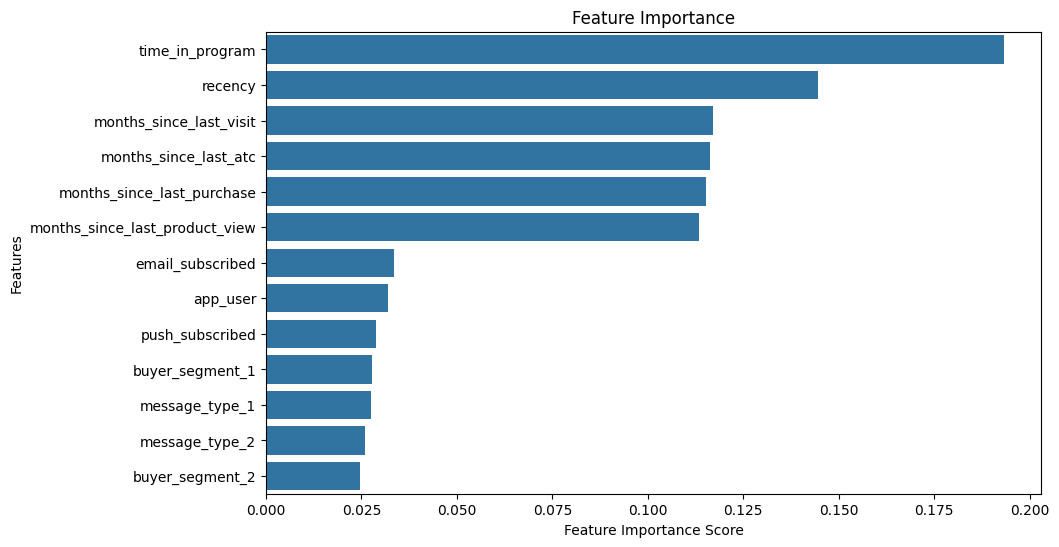

In [ ]:
# Visualize feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()
